# MUDBENCS CTD Data Visualization

This notebook allows the visualization of CTD data from Seabird .cnv files that are acquired by the Walton Smith CTD data system. 

In [1]:
#Import packages

from seabird.cnv import fCNV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MUDBENCS_calcs as MB


(((((((((((((((( MUDBENCS Date Analysis and Visualization Tools ))))))))))))))))


## CTD Data
Once the packages are imported, take a look at CTD data structure. We will extract processed data from the proprietary .cnv files and print the attributes of the data. You can see that the routines in the seabird.cnv package focus on one file at a time, so any time we will want to view data from multiple files (casts), we will need to have a loop through the files. All processed .cnv files are in the repository, with names following the convention of Expedition_StationNumber_CTDCast.cnv (for example `WS23139_STN05_04CTD.cnv`). 

In [2]:
dat_nc = fCNV('WS23139_STN05_04CTD.cnv')
print(dat_nc.attributes.keys())

dict_keys(['sbe_model', 'LATITUDE', 'LONGITUDE', 'gps_datetime', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])


In [3]:
#Print attributes such as latitude and longitude, as well as time. 
print('The profile coordinates are latitude: %.4f, and longitude: %.4f, collected at ' % (dat_nc.attributes['LATITUDE'], dat_nc.attributes['LONGITUDE']), dat_nc.attributes['gps_datetime'])
print('Data types available are: ', dat_nc.keys())


The profile coordinates are latitude: 1.6102, and longitude: -49.5952, collected at  Jun 08 2023 19:21:18
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']


[]

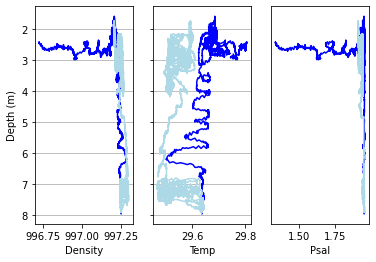

In [4]:
#Plot the CTD profiles:
MB.DEBUG = False
down_df, up_df, bottom, ax = MB.plot_profile(dat_nc, ['density', 'TEMP', 'PSAL'], direction='both')
plt.gca().set_yticks([])

#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/09CTD_temp_SSS_rho.svg', dpi=300)

### Multiple Profiles

Now that we can plot profiles from multiple variables at one station, we can use the combination of casts and variables to plot profiles for all stations and save them to a directory. Below, we manually create a list of stations for which we would like to save a profile and then we run a loop through that list to plot the profiles, create a unique and logical file name, and save the file to a directory.

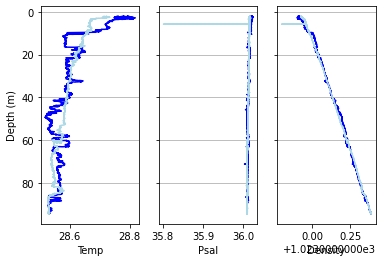

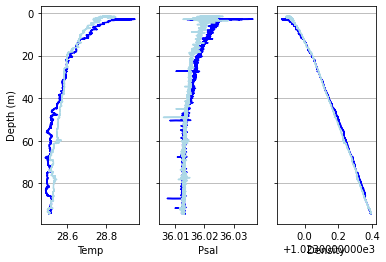

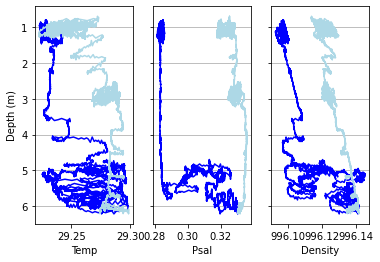

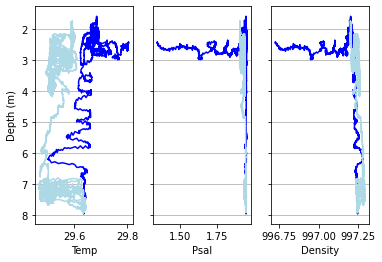

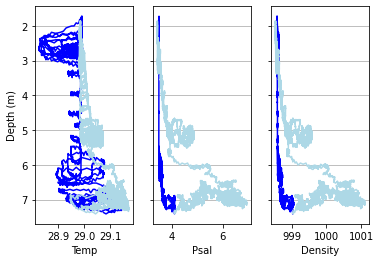

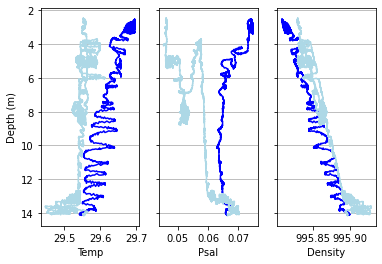

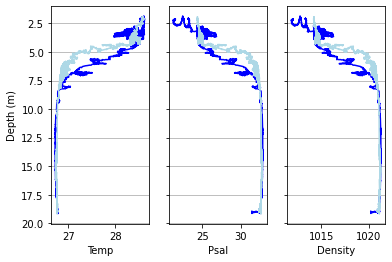

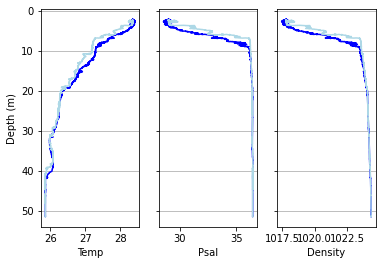

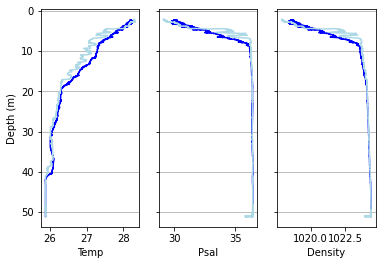

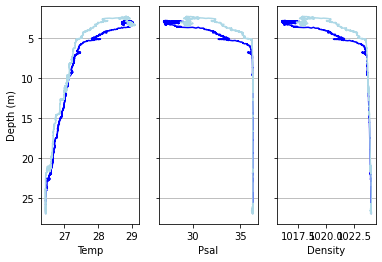

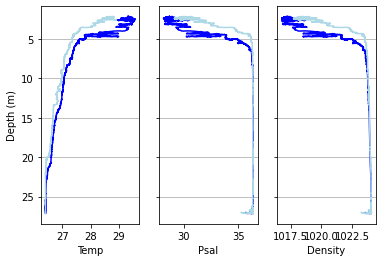

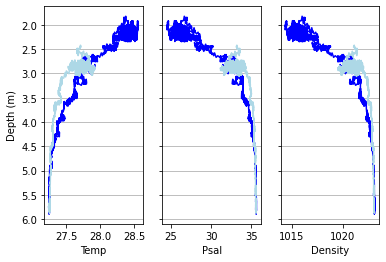

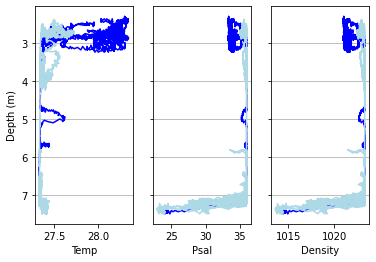

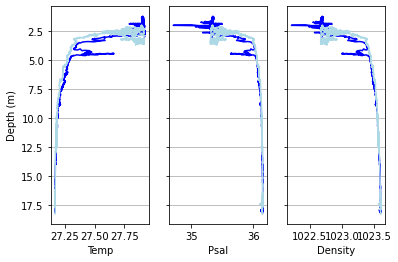

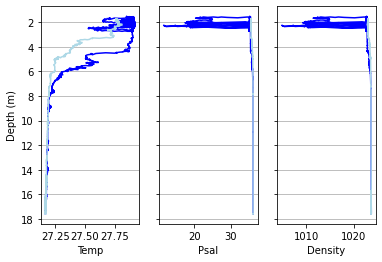

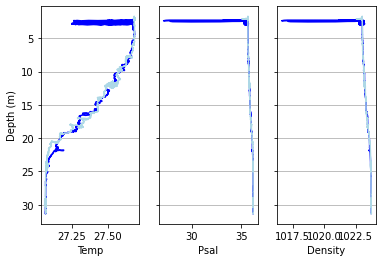

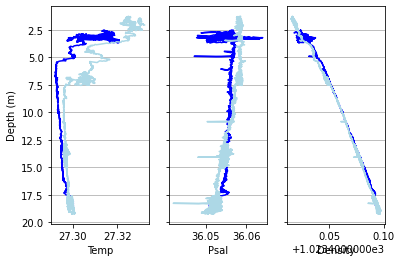

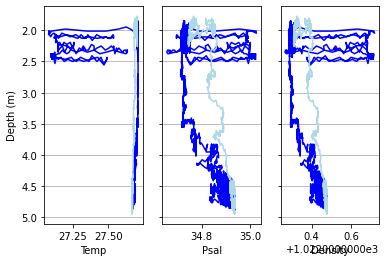

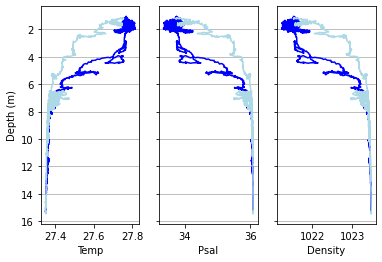

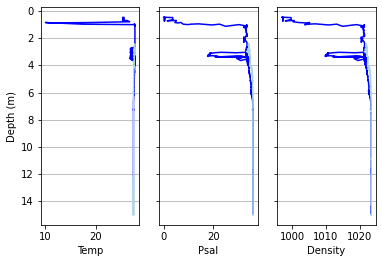

In [5]:
#Create list of stations and sequential CTDs
CTD_list = [
    'STN02_01CTD',
    'STN02_02CTD',
    'STN04_03CTD',
    'STN05_04CTD',
    'STN06_05CTD',
    'STN07_06CTD',
    'STN08_07CTD',
    'STN10_08CTD',
    'STN10_09CTD',
    'STN11_10CTD',
    'STN11_11CTD',
    'STN12_12CTD',
    'STN15_13CTD',
    'STN16_14CTD',
    'STN16_15CTD',
    'STN17_16CTD',
    'STN18_17CTD',
    'STN20_18CTD',
    'STN21_19CTD',
    'STN21_20CTD'
]

#Specify Directory:
directory = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data'

#Iterate through the list, processing and saving files
for z, ctd in enumerate(CTD_list):
    filein = 'WS23139_'+ctd+'.cnv'      #Construct filename for cnv files (inputs)
    dat_nc = fCNV(filein)
    down_df, up_df, bottom, ax = MB.plot_profile(dat_nc, [ 'TEMP', 'PSAL', 'density'], direction='both')
    directory = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data'
    fileout = 'WS23139_'+ctd+'Temp_Sal_Rho.svg'
    #plt.savefig(directory+'/'+fileout, dpi=300)
    
    

## Read Along Track Data
Along with CTD data, the WS23-139 cruise had along track data. Here we read those data into this workbook and plot some of the data. 

In [6]:
#Read in the along track data. Set the variable MB.DEBUG to True to print the colunm names. 
MB.DEBUG = True
AT_data_df = MB.read_along_track_data('Both')
print(AT_data_df.shape)

(Index(['Date_Time', 'GPS1 Lat', 'Dir', 'Lon', 'Dir.1', 'SOG Knots',
       'COG Deg. True', 'Lat Dec. Deg.', 'Lon Dec. Deg.', 'GPS2 Lat', 'Dir.2',
       'Lon.1', 'Dir.3', 'SOG Knots.1', 'COG Deg. True.1', 'Lat Dec. Deg..1',
       'Lon Dec. Deg..1', 'Gyro', 'Water Speed F/A Spd. Knots',
       'P/S Spd. Knots', 'PIR w/m^2', 'PSP w/m^2', 'TUV w/m^2',
       'Rain Gauge Cond. Code', 'Inst. Precip. mm/hr', 'Accum. Precip. mm',
       'Depth Feet', 'Meters', 'Fathoms', 'Fluorometer Reading Volts', 'Gain',
       'DisOrgMat Reading Volts', 'Gain.1', 'SBTemp Degrees C', 'POSMV Lat',
       'Dir.4', 'Lon.2', 'Dir.5', 'SOG Knots.2', 'COG Degrees T',
       'Lat Dec. Deg..2', 'Lon Dec. Deg..2', 'POSMV Heading Degrees T',
       'RM Young Barometer mb', 'Stbd RM Young Winds Rel. Wind Spd. Knots',
       'Rel. Wind Dir. Degrees', 'True Wind Spd. Knots',
       'True Wind Dir. Degrees', 'Port RM Young Met Air Temp. Degrees C',
       'Rel. Humid. %', 'Baro. Press. mb', 'MicroTSG1 Temperature Deg

## Map Along-track Data
The following cell allows you to plot any of the variables represented by the columns in the DataFrame resulting from read_along_track_data. Default variable is `' Salinity PSU'` - if you enter a non-existent variable or misspell the variable, it will return to Salinity. Additionally, the map axes are returned so you can  add points or other information (vector fields, annotations, images, etc.). Below, in several cells, you can see different keyword arguments used to add country names (`list_countries=True`), to add stations (`add_stations=True`, and `stationslist=[list]`), and to add an observed frontal boundary (`add_front=True`). Arguments for these keyword arguments are generally boolean (True or False), with the exception of `stationslist`. There is a default for the list of stations (plotting all stations with over-the-side deployments), but you can also add your own list of stations to plot using a list of station numbers in the format `'stnXX'` where XX is the two-digit sequential station number. These keyword arguments are provided for flexibility in visualizing the data.

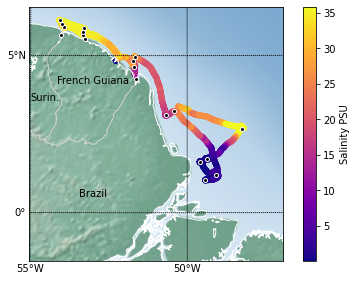

In [15]:
MB.DEBUG = False
#Plot a map of salinity with all OTS stations by specifying the kwarg for adding stations, but not a unique stationslist.
m = MB.MUDBENCS_map(AT_data_df, ' Salinity PSU', label_countries=True, add_stations=True)


plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/Salinity_w_stations.svg', dpi=600)

In [22]:
#Syntax for inspecting station coordinates, offered as an example using both station name and station number:
stations=pd.read_csv('MUDBENCS_Stations.csv')
print(stations[stations['Station Name'].str.contains('Oyapock')])
print(stations[stations['Station Number']=='stn06'])

#Note: you can also open the .csv file in a csv viewer like Excel.

   Station Number     Station Name       Lat        Lon
10          stn10    Oyapock Outer  4.966783 -51.672862
11          stn11      Oyapock Mid  4.827228 -51.721250
12          stn12    Oyapock Inner  4.623492 -51.682839
13          stn13  Oyapock Estuary  4.250210 -51.628320
  Station Number  Station Name       Lat        Lon
5          stn06  Amazon Outer  1.198867 -49.094323


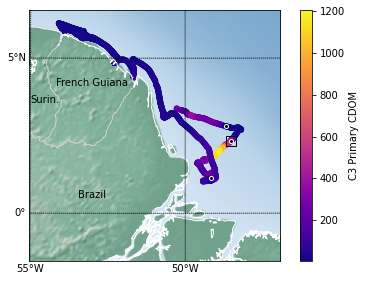

In [14]:
test_stations = ['stn01', 'stn03', 'stn6_TurbEdge']
m = MB.MUDBENCS_map(AT_data_df, ' C3 Primary CDOM', label_countries=True, add_stations=True, stationslist=test_stations, add_front=True)

plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/CDOM_tests_and_front.svg', dpi=300)

## Calculate the average position and approximate motion on-station

Using the read_along_track_data function, you can get on-station data by inserting a manual begin_end list of strings. Here, the calculation of the average lat and lon for Station 02 (Seawater Endmember) is shown. More complex calculations can be carried out for each station, but this simple one uses the pandas functions operable on dataframes. The values in square brackets and single quotes are the names of columns of data, and they must match exactly entries from the list of column names. You can see the column names by changing MB.DEBUG to True. 

In [9]:
MB.DEBUG = False
Station_data_df = MB.read_along_track_data(['16 Jun 2023 18:35', '16 Jun 2023 20:15'])
mean_lat = Station_data_df['Lat Dec. Deg.'].mean()
mean_lon = Station_data_df['Lon Dec. Deg.'].mean()
std_lat = Station_data_df['Lat Dec. Deg.'].std()
std_lon = Station_data_df['Lon Dec. Deg.'].std()

print('Mean Lat (std) = %.4f (%.3f), Mean Lon (std) = %.4f (%.3f) ' % (mean_lat, std_lat, mean_lon, std_lon))

Mean Lat (std) = 5.8863 (0.019), Mean Lon (std) = -53.9354 (0.017) 


In [11]:
#Import gravity core lats and longs, as well as isotope data from core catchers to plot into the maps
cc_dat_df = pd.read_csv('Core_Catcher_OrgGeochem.csv')
cc_coords_df = pd.read_csv('Gravity_Core_Coords.csv')
cc_dat_df['Lat Dec. Deg.'], cc_dat_df['Lon Dec. Deg.'] = np.zeros(len(cc_dat_df['Sample ID'])), np.zeros(len(cc_dat_df['Sample ID']))
print(cc_dat_df.columns)

#Add coordinates to data dataframe:
for ind, row in cc_dat_df.iterrows():
    #Find index of coordinate dataframe with the core number in the Sample ID
    for z, coords in cc_coords_df.iterrows():
        if coords['Gravity Core'] in row['Sample ID']:
            lat = coords['Lat']
            lon = coords['Lon']
            cc_dat_df['Lat Dec. Deg.'].iloc[ind] = lat
            cc_dat_df['Lon Dec. Deg.'].iloc[ind] = lon

#Remove flagged data for low N concentrations
cc_dat_noflags_df = cc_dat_df[~(cc_dat_df['flags'] == 'low N')]
print(cc_dat_df.shape, cc_dat_noflags_df.shape)
    



Index(['Sample ID', 'Percent C', 'd13C', 'Percent N', 'd15N', 'C:N', 'Age',
       'flags', 'Lat Dec. Deg.', 'Lon Dec. Deg.'],
      dtype='object')
(13, 10) (11, 10)


c:\Users\beros\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


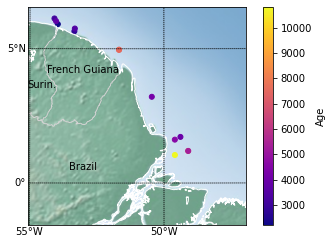

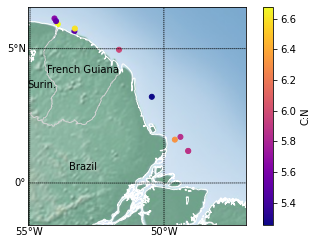

In [23]:
#Make maps of core catcher data from above, chose whether to keep flagged data or remove it

#Keep flagged data
m = MB.MUDBENCS_map(cc_dat_df, 'Age', add_stations=False)
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/14C_Age_hiN_CC.svg', dpi=300)
#remove flagged data
m_flagged = MB.MUDBENCS_map(cc_dat_noflags_df, 'C:N', add_stations=False)

                   Sample ID  Percent C  d13C  Percent N  d15N  C:N  \
0    WS23-139-01MC-3 0-2.5cm        NaN   NaN        NaN  3.90  NaN   
1  WS23-139-01MC-3 10-12.5cm        NaN   NaN        NaN  4.38  NaN   
2  WS23-139-01MC-3 12.5-15cm        NaN   NaN        NaN  4.46  NaN   
3  WS23-139-01MC-3 15-17.5cm        NaN   NaN        NaN  3.87  NaN   
4  WS23-139-01MC-3 17.5-20cm        NaN   NaN        NaN  4.38  NaN   

   Percent N (N)  flags  Top Depth  Bottom Depth  Core  
0           0.04    NaN        0.0           2.5  01MC  
1           0.04    NaN       10.0          12.5  01MC  
2           0.03    NaN       12.5          15.0  01MC  
3           0.03    NaN       15.0          17.5  01MC  
4           0.03    NaN       17.5          20.0  01MC  


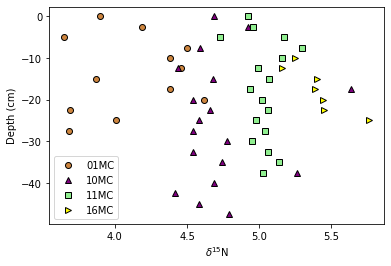

In [13]:
og_df = pd.read_csv('MultiCore_OrgGeochem.csv')

top_depth_list = []
bottom_depth_list = []
core_list = []
for n, row in og_df.iterrows():
    core = row['Sample ID'].split('-')[2]
    top = float(row['Sample ID'].split(' ')[1].split('c')[0].split('-')[0])
    bottom = float(row['Sample ID'].split(' ')[1].split('c')[0].split('-')[1])
    top_depth_list.append(top)
    bottom_depth_list.append(bottom)
    core_list.append(core)

og_df['Top Depth'] = pd.Series(top_depth_list)
og_df['Bottom Depth'] = pd.Series(bottom_depth_list)
og_df['Core'] = pd.Series(core_list)
print(og_df.head())

#Group by core and plot
corelist = ['01MC', '10MC', '11MC', '16MC']
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(og_df[og_df['Core']=='01MC']['d15N'], -og_df[og_df['Core']=='01MC']['Top Depth'], linestyle='', marker='o', mec='k', color='peru')
ax.plot(og_df[og_df['Core']=='10MC']['d15N'], -og_df[og_df['Core']=='10MC']['Top Depth'], linestyle='', marker='^', mec='k', color='purple')
ax.plot(og_df[og_df['Core']=='11MC']['d15N'], -og_df[og_df['Core']=='11MC']['Top Depth'], linestyle='', marker='s', mec='k', color='lightgreen')
ax.plot(og_df[og_df['Core']=='16MC']['d15N'], -og_df[og_df['Core']=='16MC']['Top Depth'], linestyle='', marker='>', mec='k', color='yellow')
ax.set(xlabel=r'$\delta$$^{15}$N', ylabel='Depth (cm)')
ax.legend(corelist)

plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/d15N_MCs_20230921.svg', dpi=300)
